# Welcome to $\textit{sigmaRel_Computer}$

In this tutorial, we will demonstrate use cases of the sigmaRel_computer repo. This codebase is designed for analysing supernova siblings: supernovae which explode in the same host galaxy. With individual distance estimates to supernova siblings, we can constrain the relative intrinsic scatter, $\sigma_{\rm{Rel}}$. This is the intrinsic scatter of siblings distance estimates relative to one another within a galaxy, and it quantifies the contribution towards the total intrinsic scatter, $\sigma_0$, originating from within-galaxy variations about the siblings' common properties. The contrast of $\sigma_{\rm{Rel}}$ with $\sigma_0$ indicates whether it is within-galaxy variations, or the population variation of the siblings' common properties, which contributes most towards the residual error in supernova distance estimates.

We will:

1) Simulate individual siblings distances to siblings in multiple galaxies
2) Perform a single-galaxy analysis
3) Perform a multi-galaxy analysis

# 1) Simulating fake siblings distance estimates

In [7]:
#Firstly, set up the path files, and append model_files to the path
import sys
rootpath = './'
sys.path.append(rootpath+'model_files/')

#Load in simulate_distances class
from simulate_distances import *

### Let's simulate 100 galaxies, each with 3 siblings. 

Define $(\sigma_0, \sigma_{\rm{Rel}},\sigma_{\rm{pec}}) = (0.1\,\rm{mag},0.05\,\rm{mag},250\,\rm{km}\,\rm{s}^{-1})$. 

Further, simulate external distance constraints using the fiducial cosmology: ($H_0=73.24\,\rm{km}\,\rm{s}^{-1}\,\rm{Mpc}^{-1}, \Omega_{m,0}=0.28$)

Keep other items as the default, e.g. $\hat{\sigma}_{z_{\rm{CMB}}}=1e-6$, and $\hat{\sigma}_{\rm{fit},s}=0.05\,$mag

The data are simulated and stored as a `pandas.DataFrame` called `dfmus` 

In [8]:
simulator = SiblingsDistanceSimulator(Ng=100,Sg=3,sigma0=0.1,sigmaRel=0.05,sigmapec=250,external_distances=True)
dfmus     = simulator.dfmus
dfmus.head()

,Galaxy,SN,mus,mu_errs,muext_hats,zcmb_hats,zcmb_errs
0,G1,S1_G1,37.024222,0.05,37.04987,0.060004,0.000001
1,G1,S2_G1,37.110229,0.05,37.04987,0.060004,0.000001
2,G1,S3_G1,37.161723,0.05,37.04987,0.060004,0.000001
3,G2,S1_G2,37.593862,0.05,37.60832,0.076680,0.000001
4,G2,S2_G2,37.647158,0.05,37.60832,0.076680,0.000001


# 2) Single-galaxy siblings analysis

Let's take the first galaxy, G1, and do a simple analysis. 

Firstly let's grab the galaxy, and instantiate the `single_galaxy` class

Use a fiducial value of $\sigma_0=0.1\,$mag as the prior value.

We shall `show` plots here, but not `save` them, so set these bools as well. 

In [9]:
from sigmaRel import *

dfgal  = dfmus[dfmus['Galaxy']=='G1']
sibgal = siblings_galaxy(mus     = dfgal['mus'].values,
                         errors  = dfgal['mu_errs'].values,
                         names   = dfgal['SN'].values,
                         galname = 'G1',
                         sigma0  = 0.1, show=True, save=False)

### Firstly, let's plot the individual distance estimates

We see the bold lines are just the measurement errors, or 'fitting uncertainties', whereas the faint lines also include the prior value, $\sigma_0$, via:

$$\hat{\sigma}_{\rm{tot}} = \sqrt{\hat{\sigma}^2_0+\hat{\sigma}^2_{\rm{fit},\,s}}$$

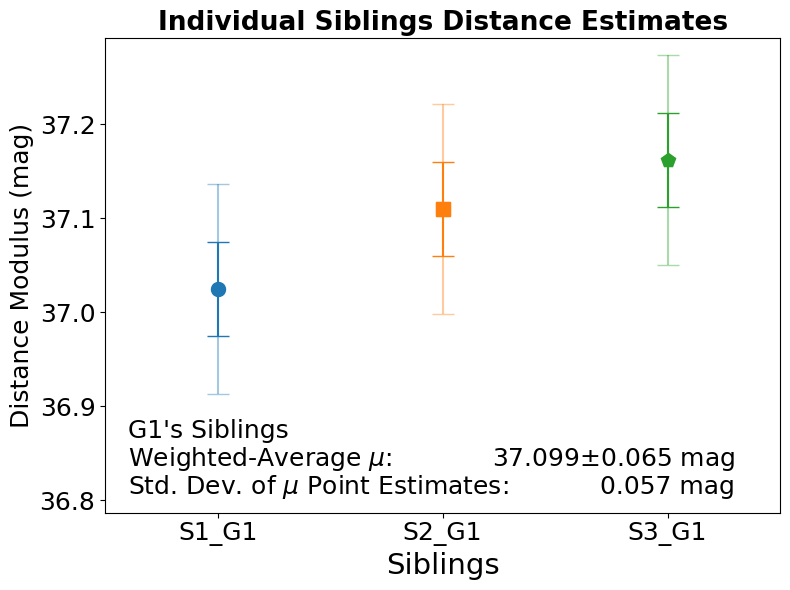

In [10]:
sibgal.plot_individual_distances()

### Next, compute analytic $\sigma_{\rm{Rel}}$ posteriors for different choices of $\sigma_0$ prior upper bound

Although the individual distance estimates are consistent with one another (small sample standard deviation of distance point estimates, and consistent within measurement errors, meaning the $\sigma_{\rm{Rel}}=0$ assumption is valid), the small sample size means larger values of $\sigma_{\rm{Rel}}$ are not ruled out. In particular, applying an uninformative prior yields a high $95\%$ upper bound, larger than typical values of $\sigma_0 \approx 0.1-0.2\,$mag.

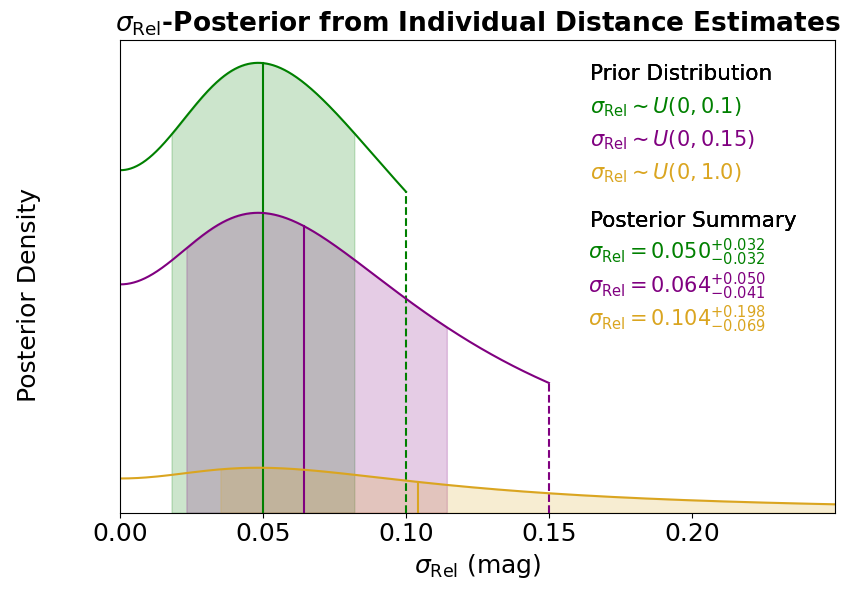

In [11]:
sibgal.plot_sigmaRel_posteriors()

### Now, compute a posterior on a common distance hyperparameter, for different intrinsic scatter modelling assumptions, either:

1) $\delta M$-Uncorrelated $\equiv \sigma_{\rm{Rel}}=\sigma_0$
2) $\delta M$-Common $\equiv \sigma_{\rm{Rel}}=0$
1) $\delta M$-Mixed $\equiv \sigma_{\rm{Rel}}\sim U(0,\sigma_0)$


In [12]:
sibgal.combine_individual_distances()

##########################################################################################
Beginning Stan fit adopting the dM-Uncorrelated assumption


16:04:29 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:04:30 - cmdstanpy - INFO - CmdStan done processing.


16:04:31 - cmdstanpy - INFO - CmdStan start processing


Fit Completed; Summary is:
mean            37.099
sd               0.064
hdi_3%          36.977
hdi_97%         37.218
mcse_mean        0.000
mcse_sd          0.000
ess_bulk     24875.000
ess_tail     39021.000
r_hat            1.000
Name: mu, dtype: float64
Estimates of distance
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dM-Uncorrelated Common-mu = 37.099+/-0.064
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##########################################################################################
Beginning Stan fit adopting the dM-Mixed assumption


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:04:32 - cmdstanpy - INFO - CmdStan done processing.


16:04:33 - cmdstanpy - INFO - CmdStan start processing


Fit Completed; Summary is:
mean            37.099
sd               0.093
hdi_3%          36.923
hdi_97%         37.274
mcse_mean        0.000
mcse_sd          0.000
ess_bulk     48070.000
ess_tail     58131.000
r_hat            1.000
Name: mu, dtype: float64
Estimates of distance
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dM-Mixed Common-mu = 37.099+/-0.093
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##########################################################################################
Beginning Stan fit adopting the dM-Common assumption


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:04:34 - cmdstanpy - INFO - CmdStan done processing.



Fit Completed; Summary is:
mean            37.099
sd               0.104
hdi_3%          36.903
hdi_97%         37.294
mcse_mean        0.001
mcse_sd          0.001
ess_bulk     19945.000
ess_tail     20241.000
r_hat            1.000
Name: mu, dtype: float64
Estimates of distance
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dM-Common Common-mu = 37.099+/-0.104
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##########################################################################################
{'uncorrelated': {'median': 37.099, 'std': 0.064}, 'mixed': {'median': 37.099, 'std': 0.093}, 'common': {'median': 37.099, 'std': 0.104}}
uncorrelated {'median': 37.099, 'std': 0.064}
mixed {'median': 37.099, 'std': 0.093}
common {'median': 37.099, 'std': 0.104}


### Plot up the results

As the siblings are assumed to be more correlated, the uncertainty on the common distance hyperparameter gets larger.

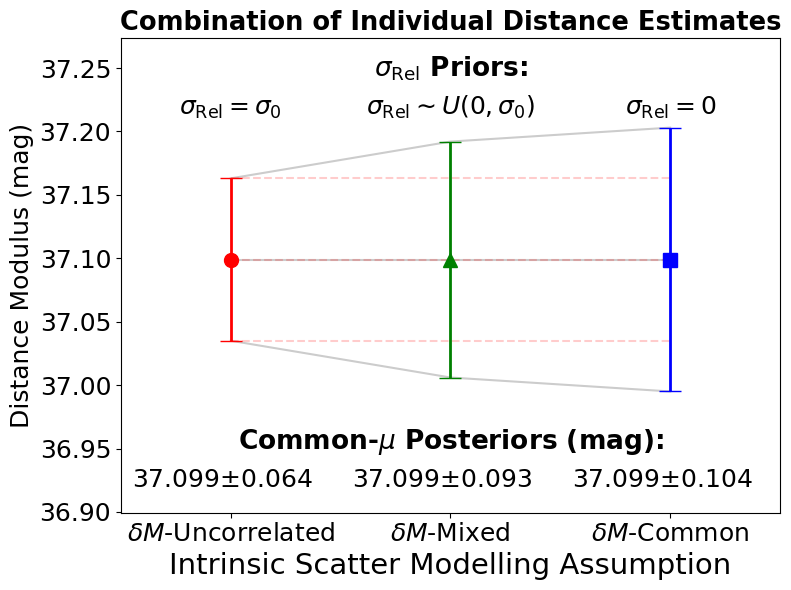

In [13]:
sibgal.plot_common_distances()

# 3) Multi-galaxy siblings analysis

Let's now instantiate the multi-galaxy siblings class.

The simplest analysis we can do is to compute analytic $\sigma_{\rm{Rel}}$ posteriors for different choices of prior, as we did above, but now using all the galaxies.

We see the posteriors are much more constraining, consistent with the true value $\sigma_{\rm{Rel}}=0.05\,$mag, and insensitive to the prior upper bound.

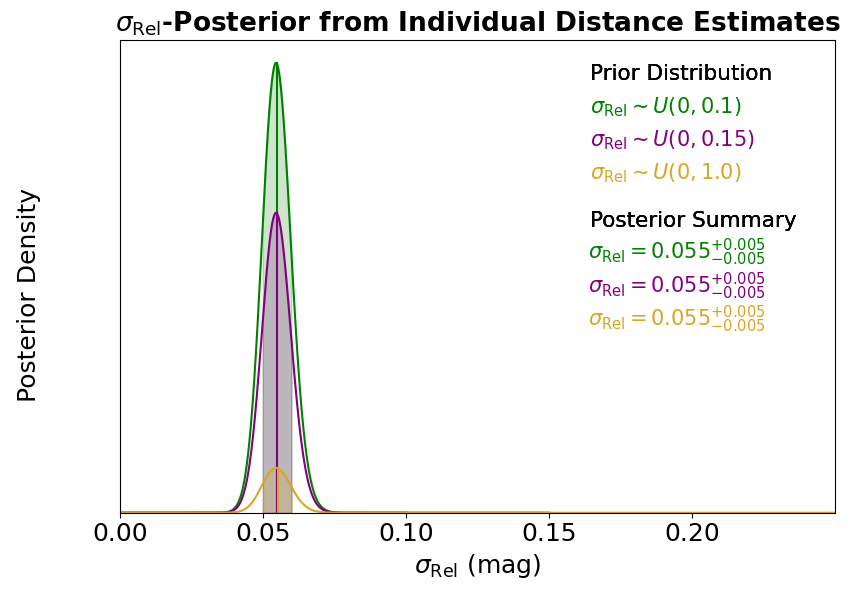

In [14]:
multigal = multi_galaxy_siblings(dfmus)

multigal.compute_analytic_multi_gal_sigmaRel_posterior(prior_upper_bounds=[0.1,0.15,1.0])

### Further, we can sample posteriors, and fit for e.g. $\sigma_0$ or $\sigma_{\rm{pec}}$, or both, using the external distances

Let's first choose to fix $\sigma_{\rm{pec}}=250\,$km$\,$s$^{-1}$, but free $\sigma_0$ (the default prior is $\sigma_0 \sim U(0,1)$).

When we build the model, a new .stan file is created to match the user specifications. 

In [15]:
#Re-instantiate class and sample
multigal = multi_galaxy_siblings(dfmus,sigma0='free',sigmapec='free',use_external_distances=True)
multigal.sigmaRel_sampler()

##############################
sigma0 is a free hyperparameter
sigmapec is a free hyperparameter
Using external distances
sigmaRel is free hyperparameter
##############################
data {
    int<lower=0> Ng;
    int<lower=2> S_g[Ng];
    int <lower=Ng*2> Nsibs;

    vector[Nsibs] mu_sib_phots;
    vector[Nsibs] mu_sib_phot_errs;

    vector[Ng] mu_ext_gal;
    vector[Ng] zcmbs;
    vector[Ng] zcmberrs;

    real<lower=0,upper=1> sigmaRel_input;      //Option to fix sigmaRel at a fraction of sigma0, if 0, don't fix, if 1, fix
    real<lower=0,upper=1> eta_sigmaRel_input;  //The fraction of sigma0, e.g. eta_sigmaRel_input=0.5 is sigmaRel = sigma0/2

    //real<lower=0,upper=1> sigma0;    //Data
    //real<lower=0,upper=1> pec_unity; //Data
}
transformed data{
  vector[Ng] mu_ext_gal_err_prefac;
  for (n in 1:Ng){
    mu_ext_gal_err_prefac[n] = 5/(log(10)*zcmbs[n]);
  }
}
parameters {
    vector[Ng] mu_true_gal;

    vector[Ng] eta_dM_common;
    vector[Nsibs] eta_dM_rel;

    real<l

16:05:05 - cmdstanpy - INFO - compiling stan file /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model.stan to exe file /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model
16:05:19 - cmdstanpy - INFO - compiled model executable: /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model
16:05:19 - cmdstanpy - WARNING - Stan compiler has produced 2 warnings:
16:05:19 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model.hpp /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model.stan
Warning in '/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_m

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:05:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
16:05:19 - cmdstanpy - ERROR - Chain [2] error: error during processing Operation not permitted
16:05:19 - cmdstanpy - ERROR - Chain [3] error: error during processing Operation not permitted
16:05:19 - cmdstanpy - ERROR - Chain [4] error: error during processing Operation not permitted


16:05:19 - cmdstanpy - INFO - CmdStan done processing.


RuntimeError: Error during sampling:

Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model', 'id=1', 'random', 'seed=43256', 'data', 'file=/var/folders/qq/n1hbyndj4lbg25_64p_fly7c0000gn/T/tmp4sgqjsov/ri_n1o2f.json', 'output', 'file=/var/folders/qq/n1hbyndj4lbg25_64p_fly7c0000gn/T/tmp4sgqjsov/current_modelf8xzisk_/current_model-20230910160519_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/qq/n1hbyndj4lbg25_64p_fly7c0000gn/T/tmp4sgqjsov/current_modelf8xzisk_/current_model-20230910160519_1.csv
 console_msgs (if any):
	/var/folders/qq/n1hbyndj4lbg25_64p_fly7c0000gn/T/tmp4sgqjsov/current_modelf8xzisk_/current_model-20230910160519_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

### Now plot the posterior

Rhats: {'sigmaRel': 1.0, 'sigma0': 1.0, 'sigmapec': 1.02}
###############
5%, 50%, 68%, 95% quantiles: 0.04, 0.05, 0.05,0.05
sigmaRel: 0.05 +/- 0.01; 16th and 84th intervals: -0.0+0.01
###############
5%, 50%, 68%, 95% quantiles: 0.09, 0.11, 0.11,0.12
sigma0: 0.11 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############
5%, 50%, 68%, 95% quantiles: 77.43, 207.54, 244.09,346.32
sigmapec: 207.54 +/- 80.87; 16th and 84th intervals: -79.63+78.62
###############
Corner samples/contours plotted successfully


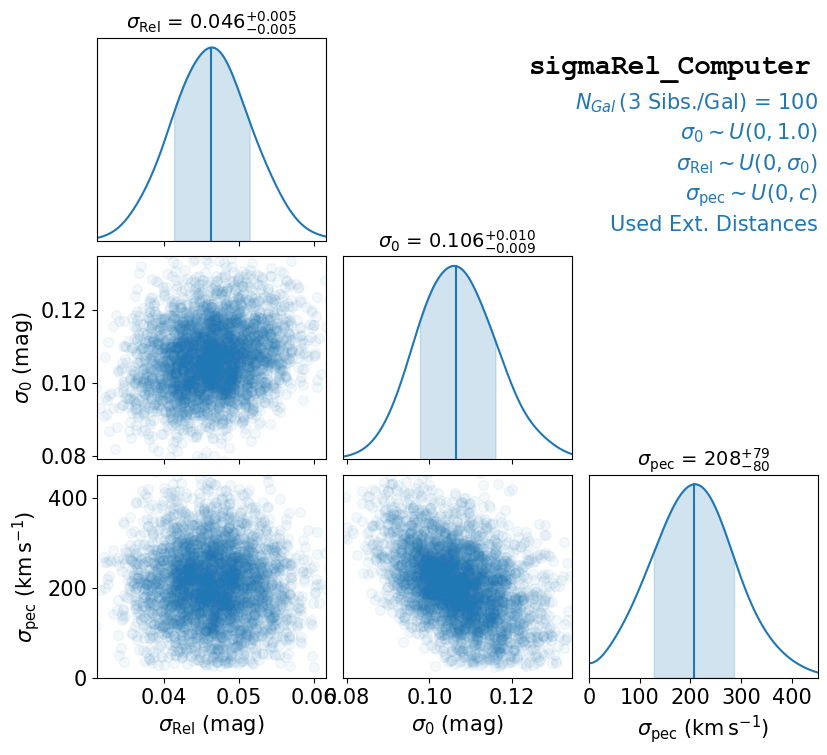

In [16]:
multigal.plot_posterior_samples(show=True,save=False)

### We can repeat this analysis, but this time freeing $\sigma_{\rm{pec}}$ as well

In [17]:
multigal.sigmaRel_sampler(sigma0='free',sigmapec='free',use_external_distances=True)
multigal.plot_posterior_samples()

##############################
sigma0 is a free hyperparameter
sigmapec is a free hyperparameter
Using external distances
sigmaRel is free hyperparameter
##############################
data {
    int<lower=0> Ng;
    int<lower=2> S_g[Ng];
    int <lower=Ng*2> Nsibs;

    vector[Nsibs] mu_sib_phots;
    vector[Nsibs] mu_sib_phot_errs;

    vector[Ng] mu_ext_gal;
    vector[Ng] zcmbs;
    vector[Ng] zcmberrs;

    real<lower=0,upper=1> sigmaRel_input;      //Option to fix sigmaRel at a fraction of sigma0, if 0, don't fix, if 1, fix
    real<lower=0,upper=1> eta_sigmaRel_input;  //The fraction of sigma0, e.g. eta_sigmaRel_input=0.5 is sigmaRel = sigma0/2

    //real<lower=0,upper=1> sigma0;    //Data
    //real<lower=0,upper=1> pec_unity; //Data
}
transformed data{
  vector[Ng] mu_ext_gal_err_prefac;
  for (n in 1:Ng){
    mu_ext_gal_err_prefac[n] = 5/(log(10)*zcmbs[n]);
  }
}
parameters {
    vector[Ng] mu_true_gal;

    vector[Ng] eta_dM_common;
    vector[Nsibs] eta_dM_rel;

    real<l

16:05:30 - cmdstanpy - INFO - compiling stan file /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model.stan to exe file /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model
16:05:44 - cmdstanpy - INFO - compiled model executable: /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model
16:05:44 - cmdstanpy - WARNING - Stan compiler has produced 2 warnings:
16:05:44 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model.hpp /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model.stan
Warning in '/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_m

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:05:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
16:05:44 - cmdstanpy - ERROR - Chain [2] error: error during processing Operation not permitted
16:05:44 - cmdstanpy - ERROR - Chain [3] error: error during processing Operation not permitted
16:05:44 - cmdstanpy - ERROR - Chain [4] error: error during processing Operation not permitted


16:05:44 - cmdstanpy - INFO - CmdStan done processing.


RuntimeError: Error during sampling:

Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model', 'id=1', 'random', 'seed=57343', 'data', 'file=/var/folders/qq/n1hbyndj4lbg25_64p_fly7c0000gn/T/tmp4sgqjsov/jwlcw43x.json', 'output', 'file=/var/folders/qq/n1hbyndj4lbg25_64p_fly7c0000gn/T/tmp4sgqjsov/current_model_921kd61/current_model-20230910160544_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/qq/n1hbyndj4lbg25_64p_fly7c0000gn/T/tmp4sgqjsov/current_model_921kd61/current_model-20230910160544_1.csv
 console_msgs (if any):
	/var/folders/qq/n1hbyndj4lbg25_64p_fly7c0000gn/T/tmp4sgqjsov/current_model_921kd61/current_model-20230910160544_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!